# Data: https://www.kaggle.com/shivam2503/diamonds

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.datasets import make_regression
from sklearn.metrics import *
from xgboost import XGBClassifier, XGBRegressor
from imblearn.datasets import make_imbalance
import statsmodels.api as sm

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


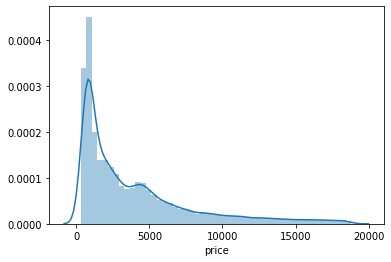

In [7]:
sns.distplot(df.price)

In [8]:
(pd.cut(df.price,bins=5).value_counts())

(307.503, 4025.4]     34663
(4025.4, 7724.8]      11271
(7724.8, 11424.2]      4109
(11424.2, 15123.6]     2308
(15123.6, 18823.0]     1589
Name: price, dtype: int64

In [9]:
(pd.cut(df.price,bins=4).value_counts())

(307.503, 4950.25]     39013
(4950.25, 9574.5]       9285
(9574.5, 14198.75]      3574
(14198.75, 18823.0]     2068
Name: price, dtype: int64

In [10]:
(pd.cut(df.price,bins=3).value_counts())

(307.503, 6491.667]      43591
(6491.667, 12657.333]     7347
(12657.333, 18823.0]      3002
Name: price, dtype: int64

In [11]:
df['price_bin']=pd.cut(df.price,bins=4,labels=[0,1,2,3])

In [12]:
df['volume'] = df.x*df.y*df.z

In [13]:
df.drop(['x','z','y'],axis=1,inplace=True)

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,price_bin,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,0,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,0,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,0,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,0,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,0,51.917250


In [15]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

***

## Pause here to check model works

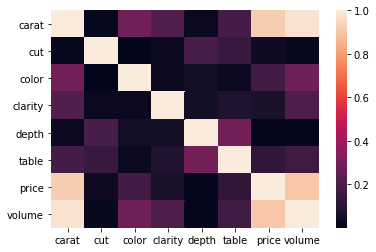

In [24]:
sns.heatmap(abs(df.corr()))

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price,price_bin,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,0,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,0,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,0,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,0,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,0,51.917250


In [20]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()
df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,price_bin,volume
0,0.23,2,1,3,61.5,55.0,326,0,38.202030
1,0.21,3,1,2,59.8,61.0,326,0,34.505856
2,0.23,1,1,4,56.9,65.0,327,0,38.076885
3,0.29,3,5,5,62.4,58.0,334,0,46.724580
4,0.31,1,6,3,63.3,58.0,335,0,51.917250


In [22]:
X=df.drop(['price','price_bin'],axis=1)
y=df.price

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [27]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
p=linreg.predict(X_train)
print(r2_score(y_test,p))
print((mean_squared_error(y_test,p))**0.5)

ValueError: Found input variables with inconsistent numbers of samples: [13485, 40455]

***

In [16]:
for col in pd.get_dummies(df.cut,prefix='cut').columns:
    df[col]=pd.get_dummies(df.cut,prefix='cut')[col]

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,price_bin,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,Ideal,E,SI2,61.5,55.0,326,0,38.202030,0,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,0,34.505856,0,0,0,1,0
2,0.23,Good,E,VS1,56.9,65.0,327,0,38.076885,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,0,46.724580,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,0,51.917250,0,1,0,0,0


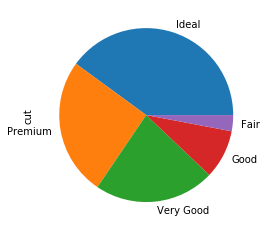

In [18]:
df.cut.value_counts().plot(kind='pie')

In [19]:
df.drop('cut_Fair',axis=1,inplace=True)

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,price_bin,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,Ideal,E,SI2,61.5,55.0,326,0,38.202030,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,0,34.505856,0,0,1,0
2,0.23,Good,E,VS1,56.9,65.0,327,0,38.076885,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,0,46.724580,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,0,51.917250,1,0,0,0


In [21]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [22]:
for col in pd.get_dummies(df.color,prefix='color').columns:
    df[col]=pd.get_dummies(df.color,prefix='color')[col]

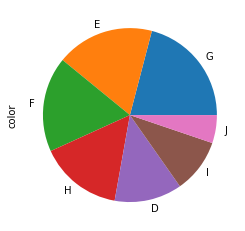

In [23]:
df.color.value_counts().plot(kind='pie')

In [24]:
df.drop('color_J',axis=1,inplace=True)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,price_bin,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I
0,0.23,Ideal,E,SI2,61.5,55.0,326,0,38.202030,0,1,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,0,34.505856,0,0,1,0,0,1,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,0,38.076885,1,0,0,0,0,1,0,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,0,46.724580,0,0,1,0,0,0,0,0,0,1
4,0.31,Good,J,SI2,63.3,58.0,335,0,51.917250,1,0,0,0,0,0,0,0,0,0


In [26]:
df.price_bin=df.price_bin.astype(float)

In [27]:
for col in df.drop(['cut','color','clarity'],axis=1).columns:
    df[col]=df[col].astype(float)

In [28]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [29]:
for col in pd.get_dummies(df.clarity,prefix='clarity').columns:
    df[col]=pd.get_dummies(df.clarity,prefix='clarity')[col]

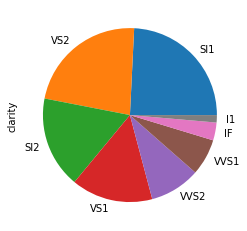

In [30]:
df.clarity.value_counts().plot(kind='pie')

In [31]:
df.drop('clarity_I1',axis=1,inplace=True)

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,price,price_bin,volume,cut_Good,...,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,0.0,38.202030,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326.0,0.0,34.505856,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327.0,0.0,38.076885,1.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334.0,0.0,46.724580,0.0,...,0.0,0.0,1.0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335.0,0.0,51.917250,1.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0


In [33]:
len(df)

53940

In [34]:
for col in df.select_dtypes(exclude='O').columns:
    df[col]=df[col].astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 26 columns):
carat            53940 non-null float64
cut              53940 non-null object
color            53940 non-null object
clarity          53940 non-null object
depth            53940 non-null float64
table            53940 non-null float64
price            53940 non-null float64
price_bin        53940 non-null float64
volume           53940 non-null float64
cut_Good         53940 non-null float64
cut_Ideal        53940 non-null float64
cut_Premium      53940 non-null float64
cut_Very Good    53940 non-null float64
color_D          53940 non-null float64
color_E          53940 non-null float64
color_F          53940 non-null float64
color_G          53940 non-null float64
color_H          53940 non-null float64
color_I          53940 non-null float64
clarity_IF       53940 non-null float64
clarity_SI1      53940 non-null float64
clarity_SI2      53940 non-null float64
clarity_VS1   

In [36]:
df_zscores = df[['carat','depth','table','volume']]

In [37]:
for col in df_zscores.columns:
    df_zscores[col] = abs(stats.zscore(df_zscores[col]))

In [38]:
df_zscores

,carat,depth,table,volume
0,1.198168,0.174092,1.099672,1.171294
1,1.240361,1.360738,1.585529,1.218533
2,1.198168,3.385019,3.375663,1.172894
3,1.071587,0.454133,0.242928,1.062372
4,1.029394,1.082358,0.242928,0.996008
...,...,...,...,...
53935,0.164427,0.662711,0.204605,0.178024
53936,0.164427,0.942753,1.099672,0.150033
53937,0.206621,0.733344,1.137995,0.196815
53938,0.130927,0.523105,0.242928,0.139520


In [45]:
len(df_zscores[df_zscores<=2].dropna())

47224

In [46]:
len(df_zscores[df_zscores<=2].dropna())/len(df)

0.8754912866147572

In [47]:
df_zscores=(df_zscores[df_zscores<=30].dropna())

In [48]:
df_new = df_zscores.join(df.drop(['carat','depth','table','volume'],axis=1))

In [49]:
df_new.reset_index(inplace=True)

In [50]:
df_new.head()

,index,carat,depth,table,volume,cut,color,clarity,price,price_bin,...,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.198168,0.174092,1.099672,1.171294,Ideal,E,SI2,326.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1.240361,1.360738,1.585529,1.218533,Premium,E,SI1,326.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1.198168,3.385019,3.375663,1.172894,Good,E,VS1,327.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,1.071587,0.454133,0.242928,1.062372,Premium,I,VS2,334.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1.029394,1.082358,0.242928,0.996008,Good,J,SI2,335.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
df_new.drop('index',axis=1,inplace=True)

In [52]:
df_new.head()

,carat,depth,table,volume,cut,color,clarity,price,price_bin,cut_Good,...,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.198168,0.174092,1.099672,1.171294,Ideal,E,SI2,326.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.240361,1.360738,1.585529,1.218533,Premium,E,SI1,326.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.198168,3.385019,3.375663,1.172894,Good,E,VS1,327.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.071587,0.454133,0.242928,1.062372,Premium,I,VS2,334.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.029394,1.082358,0.242928,0.996008,Good,J,SI2,335.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


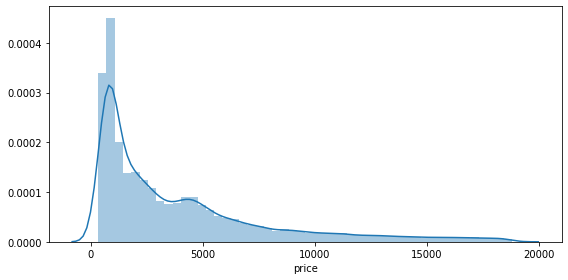

In [53]:
plt.figure(figsize=(8,4))
sns.distplot(df_new.price)
plt.tight_layout()
plt.show()

# correlation

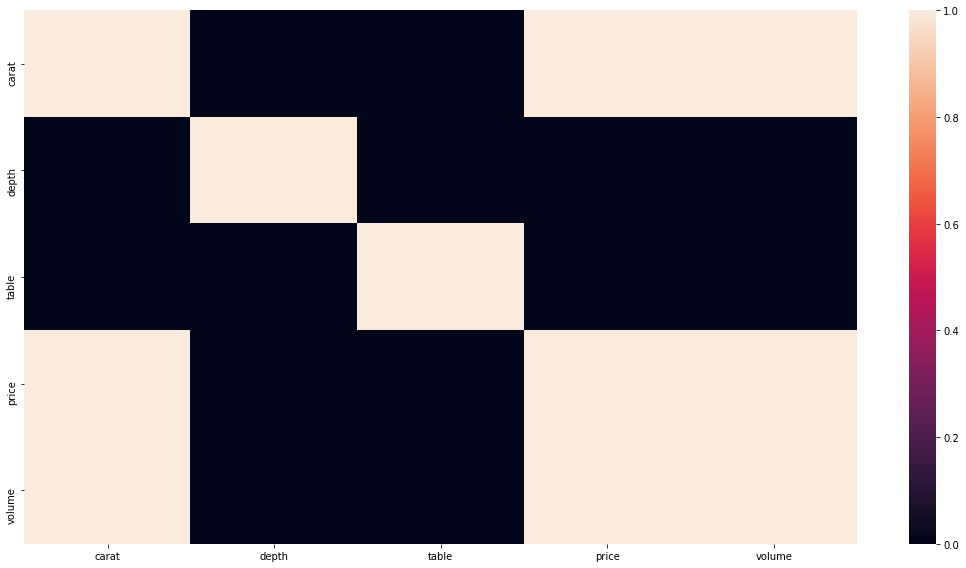

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_new.corr()>=0.7))
plt.tight_layout()
plt.show()

# balance data

In [55]:
df_new.columns

Index(['carat', 'depth', 'table', 'volume', 'cut', 'color', 'clarity', 'price',
       'price_bin', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [65]:
X1 = df_new.drop(['cut','color','clarity','price_bin','price'],axis=1)
X2 = df_new[['carat', 'cut', 'color', 'clarity', 'depth', 'table','volume']]
y1 = df_new.price_bin
y2 = df_new.price

In [57]:
target_encoder = pd.concat([X2,y2],axis=1)

In [58]:
target_encoder.head()

,carat,cut,color,clarity,depth,table,volume,price
0,1.198168,Ideal,E,SI2,0.174092,1.099672,1.171294,326.0
1,1.240361,Premium,E,SI1,1.360738,1.585529,1.218533,326.0
2,1.198168,Good,E,VS1,3.385019,3.375663,1.172894,327.0
3,1.071587,Premium,I,VS2,0.454133,0.242928,1.062372,334.0
4,1.029394,Good,J,SI2,1.082358,0.242928,0.996008,335.0


In [59]:
def target_encoding(data, column, target):
    
    grouped = data[[column,target]].groupby(column,as_index=False).mean()
    empty_dict = {}
    for i in range(len(grouped)):
        empty_dict[grouped.iloc[i,0]]=grouped.iloc[i,1]
    data[column]=data[column].map(lambda x: empty_dict[x])
    
    return data

In [60]:
for col in target_encoder.select_dtypes(include='O').columns:
    target_encoder[col]=target_encoding(target_encoder,col,'price')

In [61]:
X2 = target_encoder.drop('price',axis=1)

In [69]:
for c in X2.columns:
    X2[c]=X2[c].astype(float)

In [70]:
X2

,carat,cut,color,clarity,depth,table,volume
0,1.198168,2.0,1.0,3.0,0.174092,1.099672,1.171294
1,1.240361,3.0,1.0,2.0,1.360738,1.585529,1.218533
2,1.198168,1.0,1.0,4.0,3.385019,3.375663,1.172894
3,1.071587,3.0,5.0,5.0,0.454133,0.242928,1.062372
4,1.029394,1.0,6.0,3.0,1.082358,0.242928,0.996008
...,...,...,...,...,...,...,...
53934,0.164427,2.0,0.0,2.0,0.662711,0.204605,0.178024
53935,0.164427,1.0,0.0,2.0,0.942753,1.099672,0.150033
53936,0.206621,4.0,0.0,2.0,0.733344,1.137995,0.196815
53937,0.130927,3.0,4.0,3.0,0.523105,0.242928,0.139520


In [71]:
sgdc=SGDClassifier(random_state=14)
lr=LogisticRegression(random_state=14)
knn=KNeighborsClassifier()
svm=SVC(random_state=14)
svc=LinearSVC(random_state=14)
gnb=GaussianNB()
rfc=RandomForestClassifier(random_state=14)
dt=DecisionTreeClassifier(random_state=14)
xgbc=XGBClassifier(random_state=14)

linreg=LinearRegression()
rfr=RandomForestRegressor(random_state=14)
sgdr=SGDRegressor(random_state=14)
xgbr=XGBRegressor(random_state=14)
rid = Ridge(random_state=14)
las = Lasso(random_state=14)
el_net = ElasticNet(random_state=14)

ridge_cv = RidgeCV()
lasso_cv = LassoCV()
en_cv = ElasticNetCV()

In [72]:
def upsample_classes(data, target):
    
    labels = list(data[target].unique())
    i = 0
    lst = []
    while len(lst) < 3:
        lst.append(labels[i])
        i+=1
    
    classes = []
    for c in lst:
        classes.append(data[data[target]==c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0]
    
    a = pd.concat(classes)
    maj_class = a[a[target]==class_lab]

    lst.remove(class_lab)
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))

    b = pd.concat(new_classes)
    upsample = pd.concat([a[a[target]==class_lab],b])

    return upsample

In [73]:
def classification_model(X,y,method,target,test_balance = False):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=14)
    
    train = pd.concat([X_train,y_train],axis=1)
    
    train_balanced = upsample_classes(train,target)
    
    X_train = train_balanced.drop(target, axis=1)
    y_train = train_balanced[target]
    
    if test_balance == True:
        test = pd.concat([X_test,y_test],axis=1)
        test_balanced = upsample_classes(test,  target)
        X_test = test_balanced.drop(target, axis=1)
        y_test = test_balanced[target]
    
    method.fit(X_train,y_train)
    p = method.predict(X_test)
        
    print('accuracy score')
    print(f1_score(y_test, p ,average='micro'))
    print('-'*20)
    
    plt.figure(figsize=(15,8))
    sns.heatmap(confusion_matrix(y_test,p))
    plt.tight_layout()
    plt.show()

In [84]:
def continuous_model(X,y,method,target, scale=False):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=14)
    
    if scale==True:
        ss=StandardScaler()
        X_train=ss.fit_transform(X_train)
        X_test=ss.fit_transform(X_test)

    method.fit(X_train,y_train)
    p = method.predict(X_test)
            
    print(f'R-squared: {r2_score(y_test,p)}')
    print('-'*20)
    print(f'RMSE: {(mean_squared_error(y_test,p))**.5}')

accuracy score
0.9101223581757508
--------------------


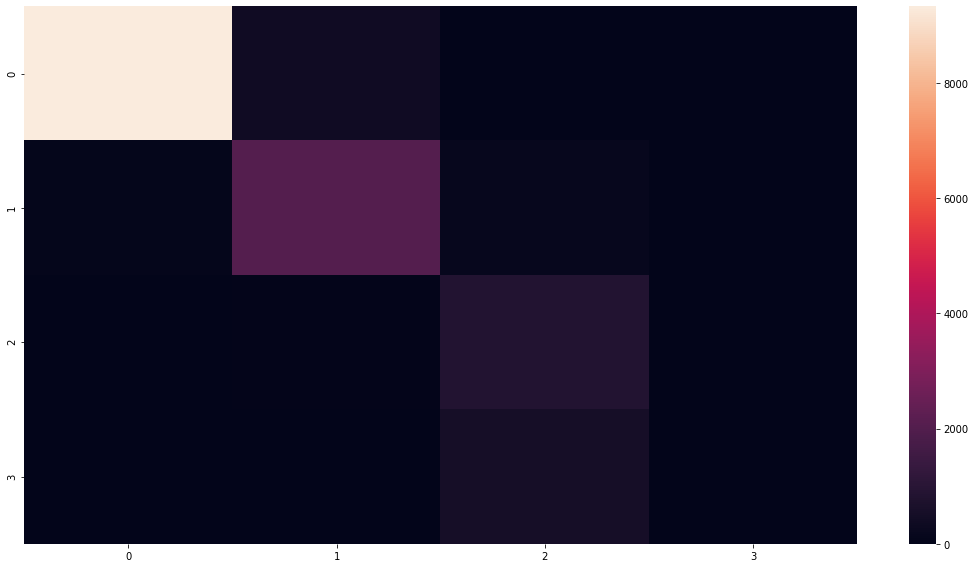

In [82]:
classification_model(X2,y1,xgbc,'price_bin')

In [85]:
continuous_model(X2,y2,linreg,'price',True)

R-squared: 0.3420975153556617
--------------------
RMSE: 3265.573372188638


## next steps - polynomial regression

In [69]:
# polynomial regression models
def polynomial_regression_model(df,target,deg,mod,preds=False):
    
    """
    Input a dataframe (df), polynomial degree (deg), model type (mod), features to use (features), 
    and choice to return predictions (preds)
    Output R-squared score and RMSE or predictions
    """
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop(target,axis=1),df[target],random_state=14)
    poly_features = PolynomialFeatures(degree=deg)
    X_train_p = poly_features.fit_transform(X_train)
    X_test_p = poly_features.fit_transform(X_test)
    poly_model = mod
    poly_model.fit(X_train_p, y_train)
    p = poly_model.predict(X_test_p)
    score = r2_score(y_test,p)
    rmse = (mean_squared_error(y_test,p))**0.5
    
    if preds==True:
        return p
    else:
        return score, rmse

In [70]:
# checking polynomial models
def check_poly_model(df,target,deg_max,mod):
    """
    Input a dataframe (df), amount of degrees to test (deg_max), model type (mod), and features to use (features)
    Output a visual showing how each additional degree affects models
    """
    rmses=[]
    scores=[]
    for i in range(1,deg_max):
        rmses.append(polynomial_regression_model(df,target,i, mod)[1])
        scores.append(polynomial_regression_model(df,target,i, mod)[0])
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title('rmse per degree')
    plt.plot(range(1,deg_max),rmses)
    plt.tight_layout()
    plt.subplot(1,2,2)
    plt.title('scores per degree')
    plt.plot(range(1,deg_max),scores)
    plt.tight_layout()
    plt.show()

In [ ]:
check_poly_model(pd.concat([X2,y2],axis=1),'price',6,linreg)

In [ ]:
polynomial_regression_model(pd.concat([X2,y2],axis=1),'price',2,rfr)

In [ ]:
continuous_model(X2,y2,xgbr,'price')

## next steps - scale and transform

In [72]:
ma = MaxAbsScaler()
ss = StandardScaler()

df_new_ss=X1.copy()
df_new_ma=X1.copy()
df_bc=X1.copy()

In [77]:
X21 = ss.fit_transform(X2)

In [78]:
continuous_model(X21,y2,linreg,'price')

R-squared: 0.3482354079710548
--------------------
RMSE: 3146.9136248932477


In [73]:
for col in X1.select_dtypes(exclude='O').columns:
    df_new_ma[col]=ma.fit_transform(df_new_ma[[col]])
    
for col in X1.select_dtypes(exclude='O').columns:
    df_new_ss[col]=ss.fit_transform(df_new_ss[[col]])
    
for col in X1.select_dtypes(exclude='O').columns:
    df_bc[col]=list(stats.boxcox(df_bc[col]+0.5))[0]

accuracy score
0.9100319683361242
--------------------


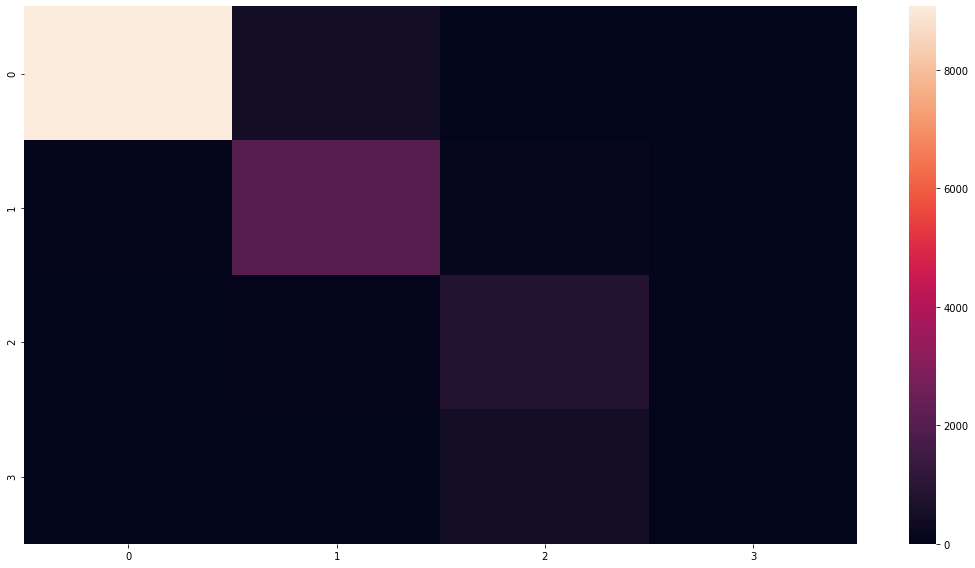

In [74]:
classification_model(df_bc,df_new.price_bin,xgbc,'price_bin')